# NSL Notebook 01

## Exercise 01.1.1, 01.1.2

Importing `mean01-blk.csv` and `var01-blk.csv`, and plot using `Dataframe` tools

In [1]:
######                        #######
##  IMPORT DEFAULT PKGS and VARS   ##
######                        #######

from default import *

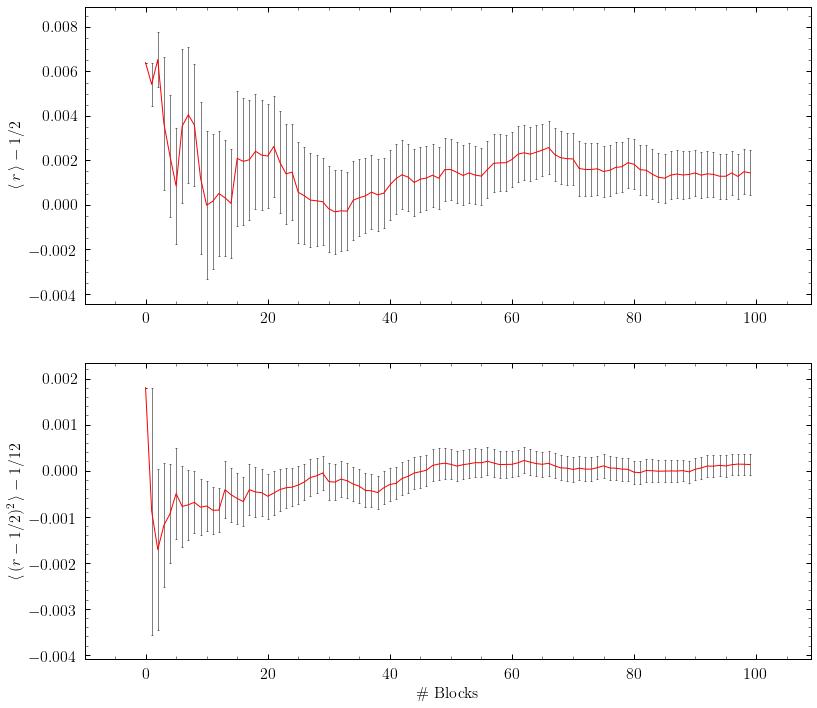

In [3]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(13,12))

# load mean conv
df_mean = pd.read_csv("mean01-blk.csv", header=None, names=["mean","mean_err"])
(df_mean["mean"]-0.5).plot.line(yerr=df_mean["mean_err"], color='r', ecolor='gray', capthick=0.5, ax=ax1)

# load variance conv
df_var = pd.read_csv("var01-blk.csv", header=None, names=["var","var_err"])
(df_var["var"]-1./12.).plot.line(yerr=df_var["var_err"], color='r', ecolor='gray', capthick=0.5, ax=ax2)

ax1.set_ylabel("$\langle\,r\,\\rangle-1/2$");

ax2.set_xlabel("\# Blocks");
ax2.set_ylabel("$\langle\,(r-1/2)^2\,\\rangle-1/12$");

## Exercise 01.1.3
Importing `chi.out`, and plot using `Dataframe` tools

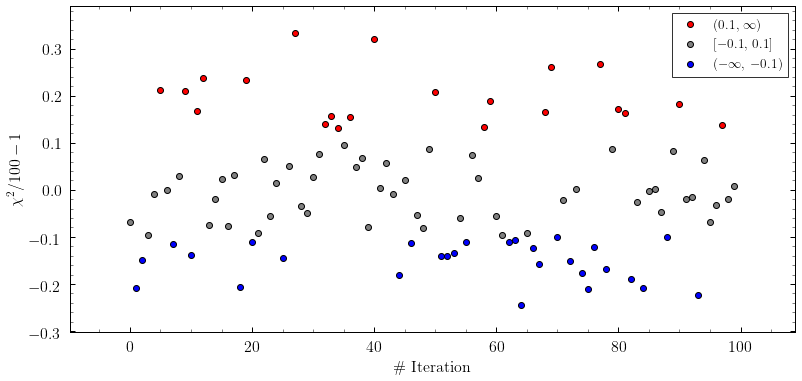

In [5]:
fig, ax = plt.subplots()

# chi^2/100 - 1
df = pd.read_csv("chi.out", header=None)/100.-1

hi = df.where(df>0.1)                           # (0.1,_)    range
mi = df.where(np.logical_and(df>-0.1,df<0.1))   # [-0.1,0.1] range
lo = df.where(df<-0.1)                          # (_,-0,1)   range

hi.plot.line(ls='', marker='o', markerfacecolor='r', ax=ax)
mi.plot.line(ls='', marker='o', markerfacecolor='gray', ax=ax)
lo.plot.line(ls='', marker='o', markerfacecolor='b', ax=ax)

ax.legend(["$(0.1,\,\infty)$", "$[-0.1,\,0.1]$", "$(-\infty,\,-0.1)$"], fontsize="small");
ax.set_xlabel("\# Iteration");
ax.set_ylabel("$\chi^2/100 - 1$");

## Exercise 01.2
Importing `Gauss-*.out` `Exp-*.out` `Cauchy-*.out` , plot dividing **N=1,2,3** from **N=100** for a clear fit

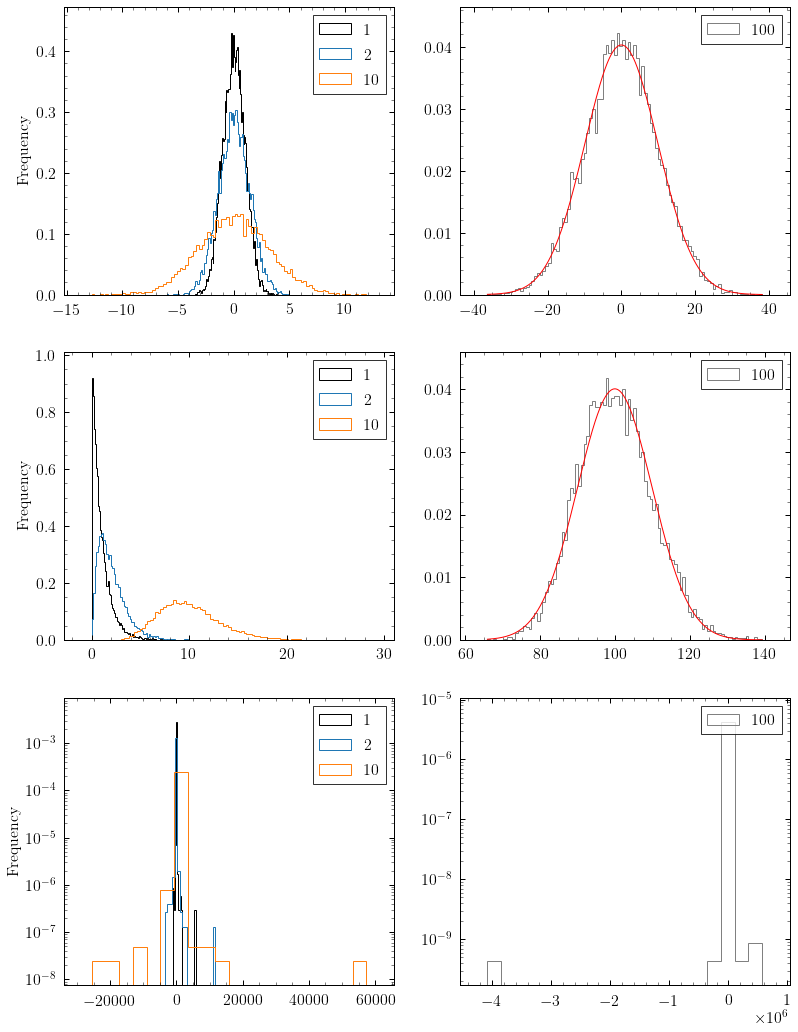

In [12]:
from scipy import stats

# Gaussian fitting function
#   return fitting series
def fit_dist(S):
    m, s = stats.norm.fit(S)
    x = np.linspace(S.min(), S.max(), S.size)
    y = stats.norm.pdf(x, m, s)
    return (x, y)

# Cauchy fitting function
#   return fitting series
def fit_dist_c(S):
    m, s = stats.cauchy.fit(S)
    x = np.linspace(S.min(), S.max(), S.size)
    y = stats.cauchy.pdf(x, m, s)
    return (x, y)
    
fig, ax_t = plt.subplots(3, 2, figsize=(13,18))

dists = ["Gauss", "Exp", "Cauchy"]  # type of distro
values = ["1", "2", "10", "100"]    # Sum values
df_dict = dict()                    # appo dict

for dist in dists:
    df_dict[dist] = pd.DataFrame(index=np.arange(10000))

# load data and fill dataframe dict
for dist in dists:
    for value in values:
        df_dict[dist][value] = pd.read_csv(dist + "-" + value + ".out", header=None)

# plot them
for dist, ax in zip(dists, ax_t):
    nbins = 20 if dist == "Cauchy" else 100
    for value in values:
        if value != "100":
            df_dict[dist][value].plot.hist(density=True, bins=nbins, histtype='step', label=value, ax=ax[0])
            
            ax[0].set_yscale('log') if dist == "Cauchy" else 0
            ax[0].legend();
        else:
            df_dict[dist][value].plot.hist(density=True, bins=nbins, histtype='step', color='gray', ax=ax[1])
            
            # fit only Gauss and Exp distro for N = 100
            if dist != "Cauchy":
                x, y = fit_dist(df_dict[dist][value])
                ax[1].plot(x, y, 'r-')
            else:
                None
            
    ax[1].legend();
    ax[1].set_ylabel("");

    if dist == "Cauchy":
        ax[1].set_yscale('log');
        ax[1].ticklabel_format(axis='x', style='sci', scilimits=(0,0));
    else:
        None

## Exercise 01.3
Importing `pi-blk.csv` and plot

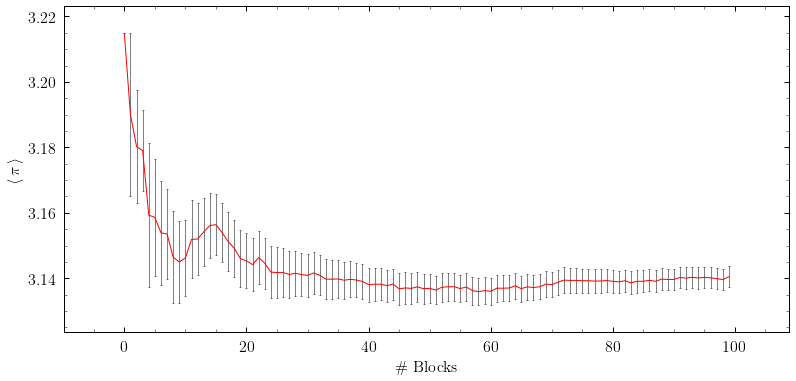

In [4]:
fig, ax = plt.subplots()

# load mean conv
df_mean = pd.read_csv("pi-blk.csv", header=None, names=["mean","mean_err"])
(df_mean["mean"]).plot.line(yerr=df_mean["mean_err"], color='r', ecolor='gray', capthick=0.5, ax=ax)

ax.set_xlabel("\# Blocks");
ax.set_ylabel("$\langle\,\pi\,\\rangle$");